In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
from optim import Adam 

In [2]:
class Model(nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        self.fc1 = nn.Linear(784,128)
        self.fc2 = nn.Linear(128,64)
        self.fc3 = nn.Linear(64,10)
        
    def forward(self,x):
        x = x.view(-1,self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.sigmoid(self.fc3(x))
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

model = Model()

In [3]:
transform = transforms.Compose(
    [
        transforms.ToTensor()
    ]
)

trainset = torchvision.datasets.MNIST(root='./data', train=True, download = True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size=4,shuffle=True, num_workers=2)


testset = torchvision.datasets.MNIST(root='./data', train=False, download = True, transform=transform)
testloader = torch.utils.data.DataLoader(testset,batch_size=4,shuffle=False, num_workers=2)


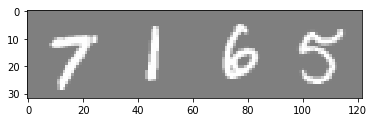

tensor(7) tensor(1) tensor(6) tensor(5)


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()
    
dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join(str(labels[j]) for j in range(4)))

In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(),lr=0.001)

In [6]:
#Training
from tqdm import tqdm
for epoch in range(2):
    running_loss = 0.0
    for i,data in tqdm(enumerate(trainloader,0)):
        inputs, labels = data
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i%2000 == 1999:
            print(f'{epoch+1}, {i+1}, loss: {running_loss / 2000}')
            running_loss=0.0
            
print('Saving Model')
PATH = './mnist_custom_adam.path'
torch.save(model.state_dict(),PATH)

0it [00:00, ?it/s]C:\Users\Revanth\Anaconda3\lib\site-packages\torch\nn\functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
2040it [00:10, 236.37it/s]

1, 2000, loss: 1.6463648988604545


4031it [00:18, 206.75it/s]

1, 4000, loss: 1.5444386211633683


6036it [00:29, 194.26it/s]

1, 6000, loss: 1.5257778016328811


8020it [00:38, 231.53it/s]

1, 8000, loss: 1.521120179414749


10018it [00:49, 187.11it/s]

1, 10000, loss: 1.5088221015930177


12024it [01:00, 167.02it/s]

1, 12000, loss: 1.508205986380577


14026it [01:11, 182.23it/s]

1, 14000, loss: 1.5059161986112595


15000it [01:17, 194.45it/s]
2016it [00:13, 162.35it/s]

2, 2000, loss: 1.4998639056682586


4026it [00:25, 174.91it/s]

2, 4000, loss: 1.4957388674616814


6022it [00:37, 175.33it/s]

2, 6000, loss: 1.496562277317047


8031it [00:48, 176.23it/s]

2, 8000, loss: 1.493517097234726


10026it [01:00, 173.04it/s]

2, 10000, loss: 1.4970793268680573


12030it [01:12, 160.48it/s]

2, 12000, loss: 1.49591514223814


14030it [01:24, 165.06it/s]

2, 14000, loss: 1.494483671426773


15000it [01:30, 164.99it/s]

Saving Model


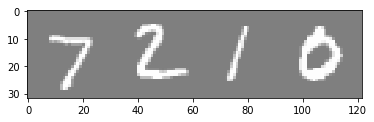

tensor(7) tensor(2) tensor(1) tensor(0)


In [7]:
#Test Data
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join(str(labels[j]) for j in range(4)))

In [8]:
model = Model()
model.load_state_dict(torch.load(PATH))

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images,labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print(f'Accuracy : {100* correct/total}')

C:\Users\Revanth\Anaconda3\lib\site-packages\torch\nn\functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Accuracy : 96.57
